In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df1=pd.read_csv('litchidata.csv')
genes=df1.loc["0":,"genes":"genes"]
C16=['C16' + str(i) for i in range(1,2)]
B16=['B16' + str(i) for i in range(1,2)]
C20=['C20' + str(i) for i in range(1,2)]
B20=['B20' + str(i) for i in range(1,2)]
C24=['C24' + str(i) for i in range(1,2)]
B24=['B24' + str(i) for i in range(1,2)]
C28=['C28' + str(i) for i in range(1,2)]
B28=['B28' + str(i) for i in range(1,2)]

data=pd.DataFrame(columns=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28],index=genes)
i=0
print(df1.iloc[i]['C16'])
print(df1.iloc[i]['B16'])
print(df1.iloc[i]['C20'])
print(df1.iloc[i]['B20'])
print(df1.iloc[i]['C24'])
print(df1.iloc[i]['B24'])




0.99
1.52
1.52
1.23
0.93
1.81


In [3]:
print(data.index)
for gene in data.index:
    data.loc[gene,'C161':'C161']=df1.iloc[i]['C16']
    data.loc[gene,'B161':'B161']=df1.iloc[i]['B16']
    data.loc[gene,'C201':'C201']=df1.iloc[i]['C20']
    data.loc[gene,'B201':'B201']=df1.iloc[i]['B20']
    data.loc[gene,'C241':'C241']=df1.iloc[i]['C24']
    data.loc[gene,'B241':'B241']=df1.iloc[i]['B24']
    data.loc[gene,'C281':'C281']=df1.iloc[i]['C28']
    data.loc[gene,'B281':'B281']=df1.iloc[i]['B28']
    i=i+1
   
    


scaled_data=StandardScaler().fit_transform(data.T)
print(scaled_data)
print(scaled_data.shape)



Index([('c57804_g1_i3',), ('c57804_g1_i8',), ('c57804_g1_i4',),
       ('c57804_g1_i1',), ('c57804_g1_i7',), ('c57804_g1_i2',),
       ('c57804_g1_i6',), ('c38005_g1_i1',), ('c68341_g1_i3',),
       ('c68341_g1_i5',),
       ...
       ('c81016_g1_i1',), ('c26459_g1_i1',), ('c83656_g1_i1',),
       ('c17472_g1_i1',), ('c28798_g1_i1',), ('c50327_g1_i2',),
       ('c10661_g1_i1',), ('c29522_g1_i2',), ('c54339_g1_i1',),
       ('c62526_g1_i4',)],
      dtype='object', length=139608)
[[-0.52963294  0.14497931 -0.159607   ...,  0.66398355 -0.73196648
   0.48443042]
 [ 0.83136322  0.12178262  1.34525903 ..., -1.10663925  2.13360441
   1.53729655]
 [ 0.83136322 -0.20297104 -0.45602001 ...,  0.12509835  0.07786877
   0.97726137]
 ..., 
 [ 1.57605923  1.37440389  0.52442301 ...,  0.12509835  0.63852395
  -0.18761178]
 [-0.29852038 -1.57157575 -1.25405503 ...,  0.51001635 -0.10901628
  -0.43402726]
 [-1.81359158 -1.47878899 -1.00324402 ..., -1.10663925 -0.23360632
  -2.00212574]]
(8, 139608)


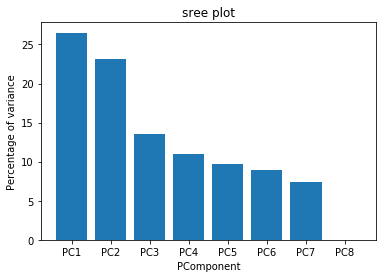

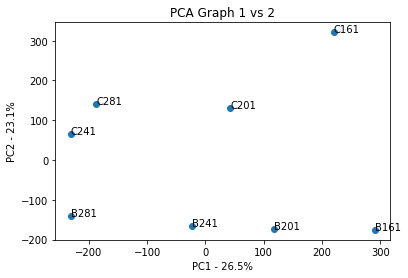

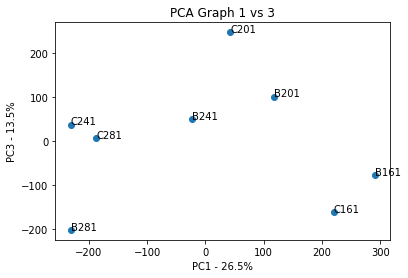

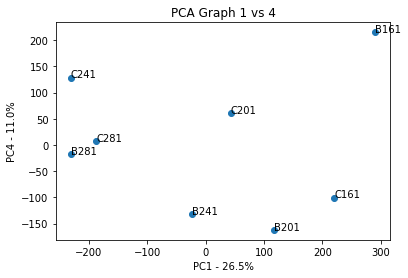

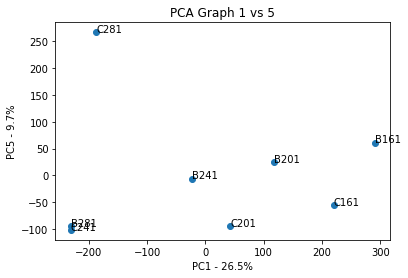

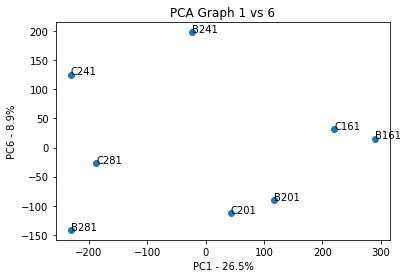

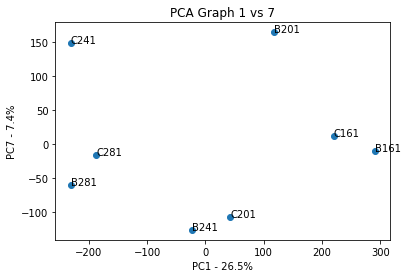

In [5]:
check_data=np.transpose(scaled_data)
dataforsave=pd.DataFrame(check_data)
dataforsave.to_csv('scaleddataalitchi.csv')

pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
figure=plt.figure()
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of variance')
plt.xlabel('PComponent')
plt.title('sree plot')
plt.show()
figure.savefig('sreeplot.png')



figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA Graph 1 vs 2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()
figure.savefig('PC1_PC2.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC3)
plt.title('PCA Graph 1 vs 3')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC3.loc[sample]))
plt.show()
figure.savefig('PC1_PC3.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC4)
plt.title('PCA Graph 1 vs 4')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('PC1_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC5)
plt.title('PCA Graph 1 vs 5')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC1_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC6)
plt.title('PCA Graph 1 vs 6')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('PC1_PC6.png')


figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*C16, *B16 , *C20, *B20, *C24, *B24, *C28, *B28 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC7)
plt.title('PCA Graph 1 vs 7')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC7 - {0}%'.format(per_var[6]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC7.loc[sample]))
plt.show()
figure.savefig('PC1_PC7.png')


loading_scores0=pd.Series(pca.components_[0],index=genes)
loading_scores0.to_csv('loadingscoresPC1.csv', sep='\t', encoding='utf-8')

loading_scores1=pd.Series(pca.components_[1],index=genes)
loading_scores1.to_csv('loadingscoresPC2.csv', sep='\t', encoding='utf-8')

loading_scores2=pd.Series(pca.components_[2],index=genes)
loading_scores2.to_csv('loadingscoresPC3.csv', sep='\t', encoding='utf-8')        
        
loading_scores3=pd.Series(pca.components_[3],index=genes)
loading_scores3.to_csv('loading_scores_alongPC4.csv', sep='\t', encoding='utf-8')   

loading_scores4=pd.Series(pca.components_[4],index=genes)
loading_scores4.to_csv('loading_scores_alongPC5.csv', sep='\t', encoding='utf-8')

loading_scores5=pd.Series(pca.components_[5],index=genes)
loading_scores5.to_csv('loading_scores_alongPC6.csv', sep='\t', encoding='utf-8')

loading_scores6=pd.Series(pca.components_[6],index=genes)
loading_scores6.to_csv('loading_scores_alongPC7.csv', sep='\t', encoding='utf-8')

loading_scores7=pd.Series(pca.components_[7],index=genes)
loading_scores7.to_csv('loading_scores_alongPC8.csv', sep='\t', encoding='utf-8')
        
        